In [3]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import pandas as pd
import numpy as np         


In [4]:
 pwd

'C:\\Users\\Manish'

In [5]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('C:\\Users\\Manish\\data (2).csv')
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
0          100002       1         Cash loans      M   N     Y             0   
1          100003       0         Cash loans      F   N     N             0   
2          100004       0    Revolving loans      M   Y     Y             0   
3          100006       0         Cash loans      F   N     Y             0   
4          100007       0         Cash loans      M   N     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99995      216086       0         Cash loans      F   N     Y             1   
99996      216087       0         Cash loans      F   N     Y             1   
99997      216088       0         Cash loans      F   Y     Y             0   
99998      216089       0         Cash loans      F   Y     N             0   
99999      216090       0    Revolving loans      M   Y     Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  ... DAYS_EMPLOYED  \
0              202500.0    406597.5         351000.0  ...          -637   
1              270000.0   1293502.5        1129500.0  ...         -1188   
2               67500.0    135000.0         135000.0  ...          -225   
3              135000.0    312682.5         297000.0  ...         -3039   
4              121500.0    513000.0         513000.0  ...         -3038   
...                 ...         ...              ...  ...           ...   
99995          157500.0    755190.0         675000.0  ...          -232   
99996          225000.0    284400.0         225000.0  ...          -182   
99997          135000.0   1262583.0        1102500.0  ...         -4805   
99998          135000.0    225000.0         225000.0  ...          -340   
99999          202500.0    337500.0         337500.0  ...         -3230   

      MOBILE WORK_PHONE HOME_PHONE  MOBILE_REACHABLE  FLAG_EMAIL  \
0          1          1          0                 1           0   
1          1          1          0                 1           0   
2          1          1          1                 1           0   
3          1          1          0                 1           0   
4          1          1          0                 1           0   
...      ...        ...        ...               ...         ...   
99995      1          1          1                 1           0   
99996      1          1          0                 1           0   
99997      1          1          0                 1           0   
99998      1          1          0                 1           0   
99999      1          1          1                 1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  APPLICATION_DAY  TOTAL_DOC_SUBMITTED  
0             Laborers              1.0        WEDNESDAY                    1  
1           Core staff              2.0           MONDAY                    1  
2             Laborers              1.0           MONDAY                    0  
3             Laborers              2.0        WEDNESDAY                    1  
4           Core staff              1.0         THURSDAY                    1  
...                ...              ...              ...                  ...  
99995      Sales staff              3.0           MONDAY                    1  
99996         Managers              3.0          TUESDAY                    1  
99997      Sales staff              2.0          TUESDAY                    1  
99998      Sales staff              2.0           FRIDAY                    2  
99999          Drivers              2.0         SATURDAY                    0  

[100000 rows x 24 columns]

In [7]:
# Checking missing values 

df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [5]:
# Null value treatment

df["AMT_GOODS_PRICE"].fillna(0, inplace = True)
df["NAME_TYPE_SUITE"].fillna("Not Available", inplace= True)
df["OCCUPATION_TYPE"].fillna("Not Available",inplace=True)
df["CNT_FAM_MEMBERS"].fillna(0, inplace = True)

In [6]:
# Checking missing values again.

df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

### Univariate Analysis 

In [17]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

In [22]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


In [7]:
y_df=df[(df.TARGET==0)&(df.NAME_INCOME_TYPE=="Working") | (df.NAME_INCOME_TYPE=="State servant") | (df.NAME_INCOME_TYPE=="Commercial associate") | (df.NAME_INCOME_TYPE=="Businessman")
       & (df.MOBILE==1)&(df.WORK_PHONE==1)&(df.MOBILE_REACHABLE==1)&(df.HOME_PHONE==1)&(df.FLAG_EMAIL==1)&(df.TOTAL_DOC_SUBMITTED==4)]
y_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
1          100003       0         Cash loans      F   N     N             0   
2          100004       0    Revolving loans      M   Y     Y             0   
3          100006       0         Cash loans      F   N     Y             0   
4          100007       0         Cash loans      M   N     Y             0   
5          100008       0         Cash loans      M   N     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99995      216086       0         Cash loans      F   N     Y             1   
99996      216087       0         Cash loans      F   N     Y             1   
99997      216088       0         Cash loans      F   Y     Y             0   
99998      216089       0         Cash loans      F   Y     N             0   
99999      216090       0    Revolving loans      M   Y     Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  ... DAYS_EMPLOYED  \
1              270000.0   1293502.5        1129500.0  ...         -1188   
2               67500.0    135000.0         135000.0  ...          -225   
3              135000.0    312682.5         297000.0  ...         -3039   
4              121500.0    513000.0         513000.0  ...         -3038   
5               99000.0    490495.5         454500.0  ...         -1588   
...                 ...         ...              ...  ...           ...   
99995          157500.0    755190.0         675000.0  ...          -232   
99996          225000.0    284400.0         225000.0  ...          -182   
99997          135000.0   1262583.0        1102500.0  ...         -4805   
99998          135000.0    225000.0         225000.0  ...          -340   
99999          202500.0    337500.0         337500.0  ...         -3230   

      MOBILE WORK_PHONE HOME_PHONE  MOBILE_REACHABLE  FLAG_EMAIL  \
1          1          1          0                 1           0   
2          1          1          1                 1           0   
3          1          1          0                 1           0   
4          1          1          0                 1           0   
5          1          1          1                 1           0   
...      ...        ...        ...               ...         ...   
99995      1          1          1                 1           0   
99996      1          1          0                 1           0   
99997      1          1          0                 1           0   
99998      1          1          0                 1           0   
99999      1          1          1                 1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  APPLICATION_DAY  TOTAL_DOC_SUBMITTED  
1           Core staff              2.0           MONDAY                    1  
2             Laborers              1.0           MONDAY                    0  
3             Laborers              2.0        WEDNESDAY                    1  
4           Core staff              1.0         THURSDAY                    1  
5             Laborers              2.0        WEDNESDAY                    1  
...                ...              ...              ...                  ...  
99995      Sales staff              3.0           MONDAY                    1  
99996         Managers              3.0          TUESDAY                    1  
99997      Sales staff              2.0          TUESDAY                    1  
99998      Sales staff              2.0           FRIDAY                    2  
99999          Drivers              2.0         SATURDAY                    0  

[77141 rows x 24 columns]

### Average income 

In [8]:
a= y_df.groupby (by=['NAME_INCOME_TYPE'])["AMT_INCOME_TOTAL"].mean()
a

NAME_INCOME_TYPE
Commercial associate    202603.538794
State servant           178125.329848
Working                 163192.065737
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

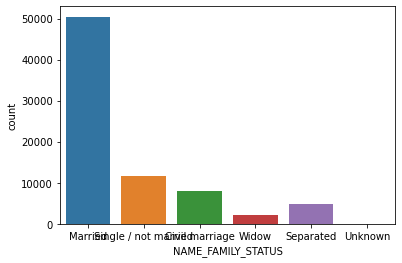

In [24]:
sns.countplot(x=y_df["NAME_FAMILY_STATUS"])

In [11]:
ab=y_df[(y_df.TARGET==0) &(y_df.Car=="Y")&(y_df.House=="Y")]    
ab

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
2          100004       0    Revolving loans      M   Y     Y             0   
6          100009       0         Cash loans      F   Y     Y             1   
7          100010       0         Cash loans      M   Y     Y             0   
15         100019       0         Cash loans      M   Y     Y             0   
20         100024       0    Revolving loans      M   Y     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99975      216066       0         Cash loans      M   Y     Y             0   
99984      216075       0         Cash loans      F   Y     Y             0   
99985      216076       0         Cash loans      M   Y     Y             0   
99997      216088       0         Cash loans      F   Y     Y             0   
99999      216090       0    Revolving loans      M   Y     Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  ... DAYS_EMPLOYED  \
2               67500.0    135000.0         135000.0  ...          -225   
6              171000.0   1560726.0        1395000.0  ...         -3130   
7              360000.0   1530000.0        1530000.0  ...          -449   
15             157500.0    299772.0         247500.0  ...         -1157   
20             135000.0    427500.0         427500.0  ...         -4286   
...                 ...         ...              ...  ...           ...   
99975          315000.0    946503.0         846000.0  ...          -735   
99984          225000.0    513531.0         459000.0  ...         -5127   
99985          157500.0    445500.0         445500.0  ...          -803   
99997          135000.0   1262583.0        1102500.0  ...         -4805   
99999          202500.0    337500.0         337500.0  ...         -3230   

      MOBILE WORK_PHONE HOME_PHONE  MOBILE_REACHABLE  FLAG_EMAIL  \
2          1          1          1                 1           0   
6          1          1          0                 1           0   
7          1          1          1                 1           0   
15         1          1          0                 1           0   
20         1          1          0                 1           0   
...      ...        ...        ...               ...         ...   
99975      1          1          0                 1           0   
99984      1          1          0                 1           0   
99985      1          1          0                 1           0   
99997      1          1          0                 1           0   
99999      1          1          1                 1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  APPLICATION_DAY  TOTAL_DOC_SUBMITTED  
2             Laborers              1.0           MONDAY                    0  
6          Accountants              3.0           SUNDAY                    2  
7             Managers              2.0           MONDAY                    1  
15            Laborers              1.0         SATURDAY                    1  
20            Laborers              2.0           FRIDAY                    0  
...                ...              ...              ...                  ...  
99975          Drivers              2.0        WEDNESDAY                    1  
99984      Sales staff              1.0           FRIDAY                    1  
99985          Drivers              2.0         SATURDAY                    1  
99997      Sales staff              2.0          TUESDAY                    1  
99999          Drivers              2.0         SATURDAY                    0  

[19489 rows x 24 columns]

### Average income based on Income Type

In [12]:
n= ab.groupby (by=['NAME_INCOME_TYPE'])["AMT_INCOME_TOTAL"].mean()
n

NAME_INCOME_TYPE
Commercial associate    233262.727152
State servant           203884.898390
Working                 185056.430258
Name: AMT_INCOME_TOTAL, dtype: float64

In [13]:
y_df.mean()

C:\Users\Manish\AppData\Local\Temp/ipykernel_12624/1559633421.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y_df.mean()


SK_ID_CURR             157987.526737
TARGET                      0.027651
CNT_CHILDREN                0.496105
AMT_INCOME_TOTAL       176408.760086
AMT_CREDIT             616261.179684
AMT_GOODS_PRICE        553977.963223
DAYS_EMPLOYED           -2421.683813
MOBILE                      0.999987
WORK_PHONE                  0.999922
HOME_PHONE                  0.240585
MOBILE_REACHABLE            0.997628
FLAG_EMAIL                  0.063676
CNT_FAM_MEMBERS             2.253264
TOTAL_DOC_SUBMITTED         0.927665
dtype: float64

### Outlier Analysis and Treatment

In [15]:
mean=int(ab.AMT_INCOME_TOTAL.mean())
x=ab[ab["AMT_INCOME_TOTAL"]>=36000].index
for index in x:
    df.loc[index,"AMT_INCOME_TOTAL"]= mean

In [18]:
info_of_cat("AMT_INCOME_TOTAL")

Unique values in AMT_INCOME_TOTAL are: [202500.  270000.  201063.  ...  73759.5 248400.  225112.5]
Mode of AMT_INCOME_TOTAL is 201063.0
Number of missing values in AMT_INCOME_TOTAL is 0


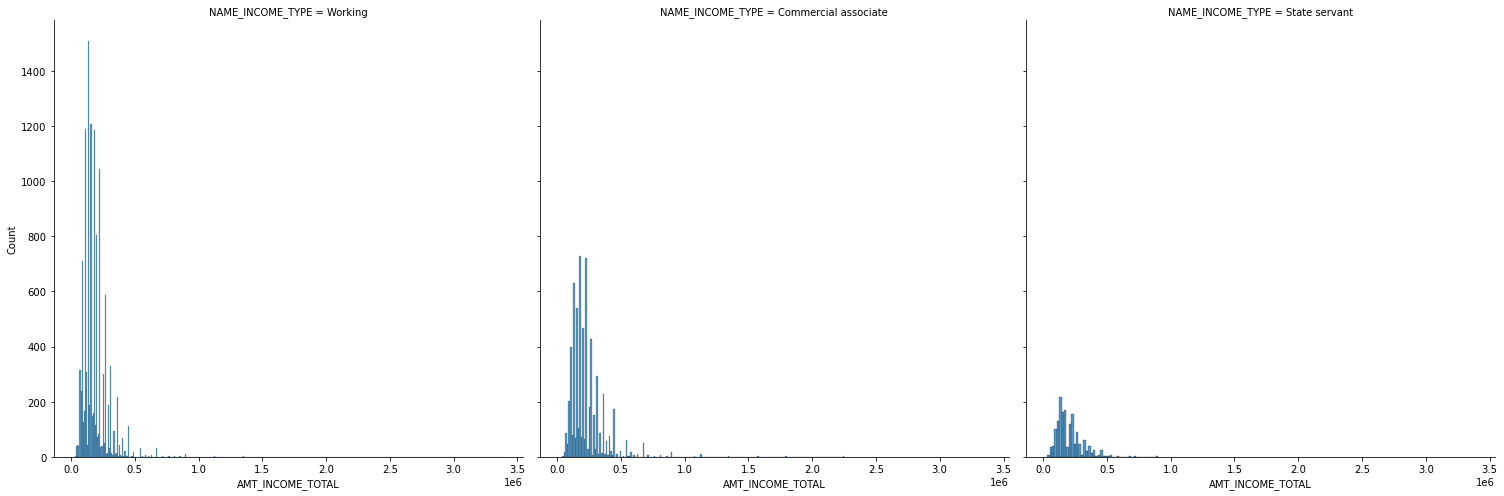

In [20]:
l=sns.FacetGrid(ab,col="NAME_INCOME_TYPE",height=7)
l.map(sns.histplot,'AMT_INCOME_TOTAL')
plt.show()

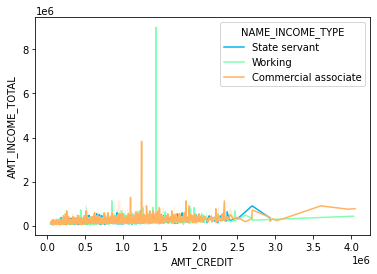

In [33]:
sns.lineplot(x=y_df["AMT_CREDIT"], y=y_df["AMT_INCOME_TOTAL"],hue=y_df["NAME_INCOME_TYPE"], palette="rainbow")
plt.show()    

### Plotting heat map

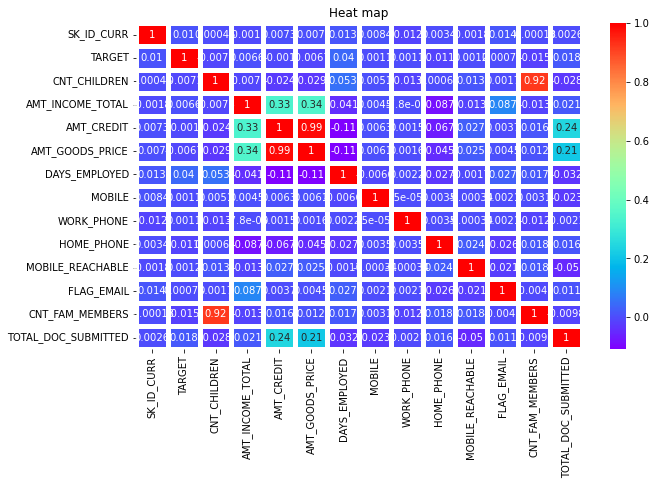

In [38]:
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(ab.corr(),cmap = "rainbow",annot=True,linewidth =5).set_title('Heat map')
plt.show()

In [25]:
n_df=df[(df.TARGET==1)&(df.NAME_INCOME_TYPE=="Pensioner") | (df.NAME_INCOME_TYPE=="Maternity leave") | (df.NAME_INCOME_TYPE=="Student") | (df.NAME_INCOME_TYPE=="Unemployed")
       & (df.MOBILE==0)&(df.WORK_PHONE==0)&(df.MOBILE_REACHABLE==0)&(df.HOME_PHONE==0)&(df.FLAG_EMAIL==0)&(df.TOTAL_DOC_SUBMITTED<=1)]
n_df


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
81         100096       1         Cash loans      F   N     Y             0   
283        100326       1         Cash loans      M   Y     Y             0   
344        100396       1         Cash loans      M   N     N             0   
348        100401       1         Cash loans      F   N     Y             0   
586        100672       1         Cash loans      M   N     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99649      215690       1         Cash loans      F   N     Y             0   
99665      215706       1    Revolving loans      M   Y     Y             0   
99672      215715       1         Cash loans      F   N     Y             0   
99754      215808       1         Cash loans      F   N     N             0   
99801      215858       1    Revolving loans      M   Y     Y             1   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  ... DAYS_EMPLOYED  \
81              81000.0    252000.0         252000.0  ...        365243   
283             36000.0    284400.0         225000.0  ...        365243   
344            112500.0    417024.0         360000.0  ...        365243   
348            202500.0    343683.0         261000.0  ...        365243   
586            112500.0    808650.0         675000.0  ...        365243   
...                 ...         ...              ...  ...           ...   
99649           93150.0    886176.0         765000.0  ...        365243   
99665          135000.0    360000.0         360000.0  ...        365243   
99672          112500.0    296280.0         225000.0  ...        365243   
99754           36436.5     67500.0          67500.0  ...        365243   
99801          225000.0    270000.0         270000.0  ...        365243   

      MOBILE WORK_PHONE HOME_PHONE  MOBILE_REACHABLE  FLAG_EMAIL  \
81         1          0          0                 1           0   
283        1          0          0                 1           0   
344        1          0          0                 1           0   
348        1          0          0                 1           0   
586        1          0          0                 1           0   
...      ...        ...        ...               ...         ...   
99649      1          0          0                 1           0   
99665      1          0          0                 1           0   
99672      1          0          0                 1           1   
99754      1          0          0                 1           0   
99801      1          0          0                 1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  APPLICATION_DAY  TOTAL_DOC_SUBMITTED  
81       Not Available              2.0         THURSDAY                    1  
283      Not Available              2.0           MONDAY                    1  
344      Not Available              1.0         SATURDAY                    1  
348      Not Available              1.0         THURSDAY                    1  
586      Not Available              2.0           SUNDAY                    1  
...                ...              ...              ...                  ...  
99649    Not Available              2.0         THURSDAY                    1  
99665    Not Available              1.0           MONDAY                    0  
99672    Not Available              1.0          TUESDAY                    1  
99754    Not Available              1.0        WEDNESDAY                    1  
99801    Not Available              3.0        WEDNESDAY                    0  

[988 rows x 24 columns]

### Income by Income Type

Working                 62.132485
Commercial associate    30.217046
State servant            7.650469
Name: NAME_INCOME_TYPE, dtype: float64


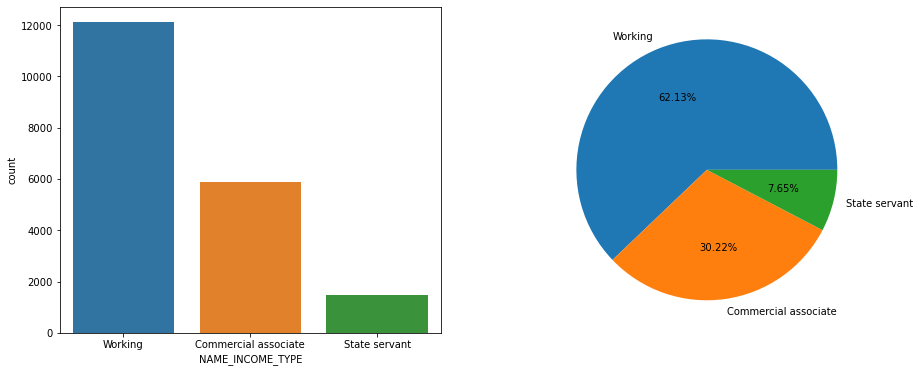

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (ab["NAME_INCOME_TYPE"].value_counts()/len(ab))*100      # value count is a function to calulate the number of the income type 
                                                                        #keeping its classes as index. 
print(percentage)
sns.countplot(x = ab["NAME_INCOME_TYPE"], ax = ax[0])
labels = list(ab["NAME_INCOME_TYPE"].value_counts().index)            # value_counts returns the count of the classes present in the incomr type and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()                                                            


### Gender and Income Type analysis based on Family Status

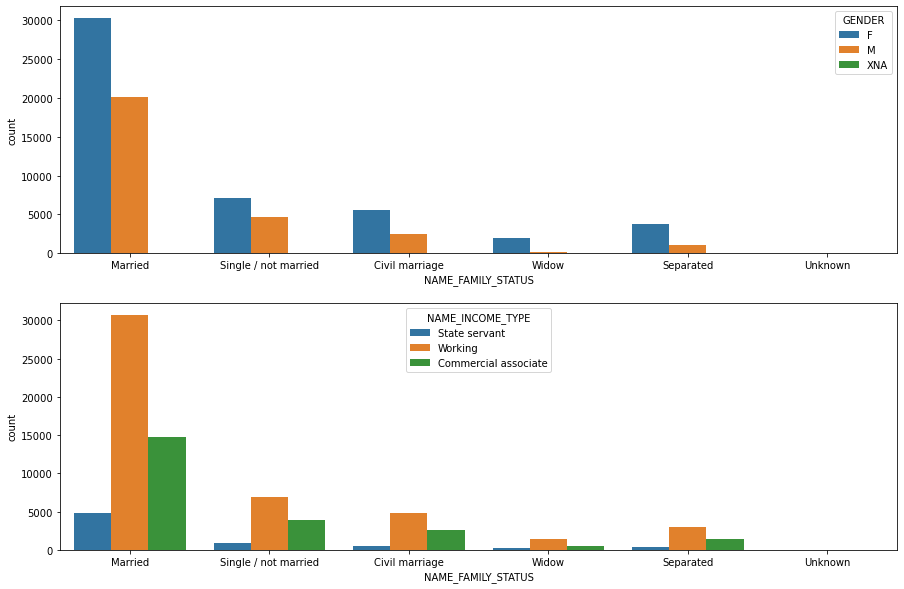

In [20]:
fig, ax = plt.subplots(2,figsize=(15, 10))
sns.countplot(x='NAME_FAMILY_STATUS', hue ='GENDER', data=y_df,ax=ax[0])
sns.countplot(x='NAME_FAMILY_STATUS', hue ='NAME_INCOME_TYPE', data=y_df,ax=ax[1])
plt.savefig("MyDashboard.jpg")             
plt.show()
plt.close() 

In [21]:
y_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   77141.000000  77141.000000  77141.000000      7.714100e+04   
mean   157987.526737      0.027651      0.496105      1.764088e+05   
std     33477.339955      0.163971      0.759591      1.072034e+05   
min    100003.000000      0.000000      0.000000      2.565000e+04   
25%    129035.000000      0.000000      0.000000      1.125000e+05   
50%    157829.000000      0.000000      0.000000      1.575000e+05   
75%    186965.000000      0.000000      1.000000      2.160000e+05   
max    216090.000000      1.000000     12.000000      9.000000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_EMPLOYED        MOBILE  \
count  7.714100e+04     7.714100e+04   77141.000000  77141.000000   
mean   6.162612e+05     5.539780e+05   -2421.683813      0.999987   
std    4.101591e+05     3.774293e+05    2366.261157      0.003600   
min    4.500000e+04     0.000000e+00  -17531.000000      0.000000   
25%    2.762775e+05     2.475000e+05   -3223.000000      1.000000   
50%    5.212800e+05     4.500000e+05   -1681.000000      1.000000   
75%    8.353800e+05     7.020000e+05    -781.000000      1.000000   
max    4.050000e+06     4.050000e+06       0.000000      1.000000   

         WORK_PHONE    HOME_PHONE  MOBILE_REACHABLE    FLAG_EMAIL  \
count  77141.000000  77141.000000      77141.000000  77141.000000   
mean       0.999922      0.240585          0.997628      0.063676   
std        0.008819      0.427442          0.048649      0.244176   
min        0.000000      0.000000          0.000000      0.000000   
25%        1.000000      0.000000          1.000000      0.000000   
50%        1.000000      0.000000          1.000000      0.000000   
75%        1.000000      0.000000          1.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

       CNT_FAM_MEMBERS  TOTAL_DOC_SUBMITTED  
count     77141.000000         77141.000000  
mean          2.253264             0.927665  
std           0.937764             0.366230  
min           0.000000             0.000000  
25%           2.000000             1.000000  
50%           2.000000             1.000000  
75%           3.000000             1.000000  
max          14.000000             3.000000

In [22]:
new=ab[(ab.TARGET==0)&(ab.AMT_INCOME_TOTAL>=100000) &(ab.MOBILE==1)&(ab.WORK_PHONE==1)&(ab.HOME_PHONE==1)]
new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
7          100010       0         Cash loans      M   Y     Y             0   
59         100070       0         Cash loans      M   Y     Y             0   
225        100262       0         Cash loans      M   Y     Y             0   
236        100274       0         Cash loans      M   Y     Y             0   
280        100323       0         Cash loans      M   Y     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99828      215890       0         Cash loans      M   Y     Y             0   
99851      215919       0         Cash loans      M   Y     Y             2   
99905      215987       0         Cash loans      M   Y     Y             0   
99908      215990       0         Cash loans      M   Y     Y             1   
99999      216090       0    Revolving loans      M   Y     Y             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  ... DAYS_EMPLOYED  \
7              360000.0   1530000.0        1530000.0  ...          -449   
59             540000.0   1227901.5        1129500.0  ...         -2091   
225            315000.0   1575000.0        1575000.0  ...         -3339   
236            308250.0   1305000.0        1305000.0  ...         -1106   
280            450000.0   1575000.0        1575000.0  ...         -2363   
...                 ...         ...              ...  ...           ...   
99828          133564.5    450000.0         450000.0  ...          -274   
99851          270000.0    577147.5         459000.0  ...         -2584   
99905          202500.0   1350000.0        1350000.0  ...         -4110   
99908          247500.0   1314117.0        1147500.0  ...          -316   
99999          202500.0    337500.0         337500.0  ...         -3230   

      MOBILE WORK_PHONE HOME_PHONE  MOBILE_REACHABLE  FLAG_EMAIL  \
7          1          1          1                 1           0   
59         1          1          1                 1           0   
225        1          1          1                 1           0   
236        1          1          1                 1           0   
280        1          1          1                 1           0   
...      ...        ...        ...               ...         ...   
99828      1          1          1                 1           0   
99851      1          1          1                 1           0   
99905      1          1          1                 1           1   
99908      1          1          1                 1           0   
99999      1          1          1                 1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  APPLICATION_DAY  TOTAL_DOC_SUBMITTED  
7             Managers              2.0           MONDAY                    1  
59            Managers              1.0          TUESDAY                    1  
225            Drivers              2.0         SATURDAY                    1  
236            Drivers              2.0           MONDAY                    1  
280           Managers              2.0        WEDNESDAY                    1  
...                ...              ...              ...                  ...  
99828      Sales staff              2.0           FRIDAY                    1  
99851          Drivers              4.0        WEDNESDAY                    1  
99905         Laborers              2.0         SATURDAY                    1  
99908    Not Available              3.0           SUNDAY                    1  
99999          Drivers              2.0         SATURDAY                    0  

[3162 rows x 24 columns]

These Customers have provided home contact, mobile number, work contact, Email and their contact is rechable. They have good amount of total earning, they can pay the loan amount.

In [23]:
# Adding data to new excel file 
new.to_excel('Loan_approval.xlsx')

In [26]:
# Average income based on income type (for n_df)

m= n_df.groupby (by=['NAME_INCOME_TYPE'])["AMT_CREDIT"].mean()
m

NAME_INCOME_TYPE
Maternity leave    765000.000000
Pensioner          566207.687117
Student            539452.500000
Name: AMT_CREDIT, dtype: float64

Pensioner          98.987854
Student             0.910931
Maternity leave     0.101215
Name: NAME_INCOME_TYPE, dtype: float64


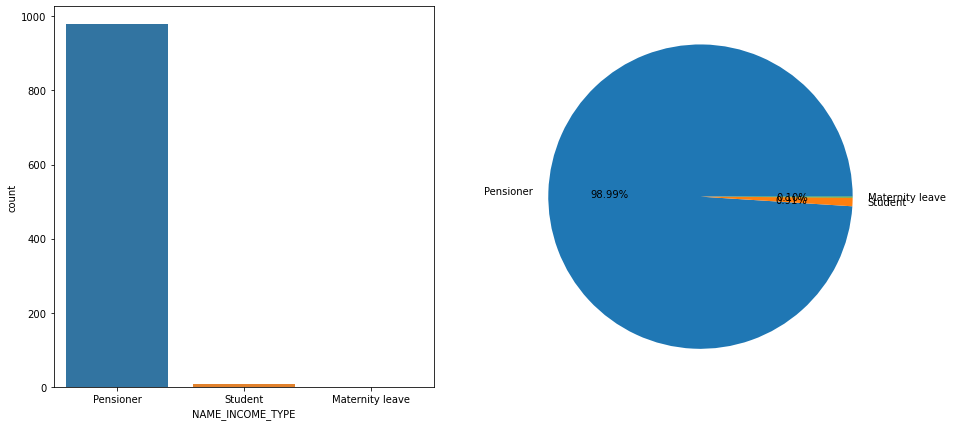

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
percentage = (n_df["NAME_INCOME_TYPE"].value_counts()/len(n_df))*100      # value count is a function to calulate the number of the income type 
                                                                        #keeping its classes as index. 
print(percentage)
sns.countplot(x = n_df["NAME_INCOME_TYPE"], ax = ax[0])
labels = list(n_df["NAME_INCOME_TYPE"].value_counts().index)            # value_counts returns the count of the classes present in the incomr type and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()                                                            


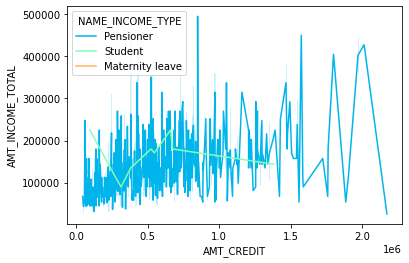

In [29]:
sns.lineplot(x=n_df["AMT_CREDIT"], y=n_df["AMT_INCOME_TOTAL"],hue=n_df["NAME_INCOME_TYPE"], palette="rainbow")
plt.show() 

In [34]:
new1=n_df[(n_df.TARGET==1)&(n_df.Car=="N")&(n_df.House=="N")]
new1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
344        100396       1         Cash loans      M   N     N             0   
1340       101574       1         Cash loans      M   N     N             0   
1341       101575       1    Revolving loans      M   N     N             0   
1756       102053       1         Cash loans      F   N     N             0   
2181       102559       1         Cash loans      F   N     N             0   
...           ...     ...                ...    ...  ..   ...           ...   
98702      214607       1         Cash loans      F   N     N             0   
99297      215288       1         Cash loans      F   N     N             0   
99337      215330       1         Cash loans      M   N     N             0   
99544      215572       1         Cash loans      F   N     N             0   
99754      215808       1         Cash loans      F   N     N             0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  ... DAYS_EMPLOYED  \
344            112500.0    417024.0         360000.0  ...        365243   
1340           202500.0    450000.0         450000.0  ...        365243   
1341           112500.0    337500.0         337500.0  ...        365243   
1756           157500.0    720000.0         720000.0  ...        365243   
2181           450000.0    382500.0         382500.0  ...        365243   
...                 ...         ...              ...  ...           ...   
98702          121500.0   1125000.0        1125000.0  ...        365243   
99297           90000.0    118602.0          99000.0  ...        365243   
99337           81000.0    598486.5         454500.0  ...        365243   
99544          180000.0    720000.0         720000.0  ...        365243   
99754           36436.5     67500.0          67500.0  ...        365243   

      MOBILE WORK_PHONE HOME_PHONE  MOBILE_REACHABLE  FLAG_EMAIL  \
344        1          0          0                 1           0   
1340       1          0          0                 1           0   
1341       1          0          0                 1           0   
1756       1          0          0                 1           0   
2181       1          0          0                 1           0   
...      ...        ...        ...               ...         ...   
98702      1          0          0                 1           0   
99297      1          0          0                 1           0   
99337      1          0          0                 1           0   
99544      1          0          0                 1           0   
99754      1          0          0                 1           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  APPLICATION_DAY  TOTAL_DOC_SUBMITTED  
344      Not Available              1.0         SATURDAY                    1  
1340     Not Available              2.0          TUESDAY                    1  
1341     Not Available              2.0           MONDAY                    0  
1756     Not Available              2.0         THURSDAY                    1  
2181     Not Available              1.0         SATURDAY                    1  
...                ...              ...              ...                  ...  
98702    Not Available              1.0           MONDAY                    1  
99297    Not Available              2.0          TUESDAY                    1  
99337    Not Available              2.0           MONDAY                    1  
99544    Not Available              1.0         THURSDAY                    1  
99754    Not Available              1.0        WEDNESDAY                    1  

[206 rows x 24 columns]

In [35]:
new1.to_excel('Loan_rejection.xlsx')